# Biz2Credit Data Analytics Assignment

Siddarth Sharma 7205197439 

In [322]:
#importing the necessary packages and the excel file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df= pd.read_excel(io="Data Analytics Assignment.xlsx")

In [323]:
#lets have a look at our data set
df.head()

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1


In [324]:
#Let us check if there are any missing values
df.isna().sum()

Lead ID             0
bankid              0
bank_account_id     0
account_number      0
Industry            0
post_date           0
description         0
transaction_type    0
amount              0
running_balance     0
trans_order         0
dtype: int64

Since the Dataset is clean, we can start solving 

## 1. Count the number of merchants, bank accounts and tabulate:
(i) the number of bank accounts for each merchant:

In [325]:
print("the total number of Merchants are:",df['Lead ID'].nunique())
print("the total number of Bank Accounts are:",df['bank_account_id'].nunique())
print("the total number of Banks are:",df['bankid'].nunique())

the total number of Merchants are: 21
the total number of Bank Accounts are: 53
the total number of Banks are: 10


# tabulate: (i) the number of bank accounts for each merchant:

In [326]:
df_bank= df.groupby("Lead ID")
df_bank= df_bank.agg({"bank_account_id": "nunique"})
df_bank = df_bank.sort_values('bank_account_id', ascending=False).reset_index()
print("Each Merchant has the following number of bank accounts:\n")
df_bank

Each Merchant has the following number of bank accounts:



,Lead ID,bank_account_id
0,321380,8
1,318465,7
2,316728,6
3,321356,5
4,312745,5
5,326062,3
6,314559,2
7,321146,2
8,310443,2
9,323253,2


<Figure size 1584x360 with 0 Axes>

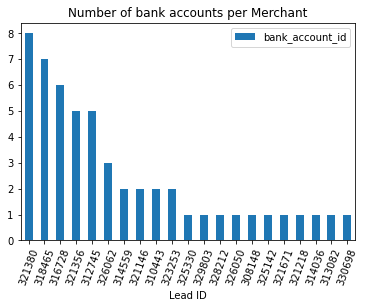

In [327]:
plt.figure(figsize =(22,5))
df_bank.plot.bar(x="Lead ID", y="bank_account_id", rot=70, title="Number of bank accounts per Merchant");
plt.show(block=True)

# (ii) the number of months of each bank account for which data is available

In [328]:
df['Year-month'] = df['post_date'].dt.strftime('%Y-%m')

I created a new column called -"year-month" from the post_date. Taking a count of unique month-year pair for every bank account will give me the answer. NOTE: For some bank accounts, a month is repeated twice but in two different year for eg: dec 2016, dec 2015. I have counted it has two different entries.

In [329]:
df_month = df.groupby("bank_account_id")
df_month = df_month.agg({"Year-month": "nunique"})
df_month = df_month.sort_values('Year-month', ascending=False).reset_index()
print("The number of months of each bank account for which data is available are (For convinience, only top 5 are shown):")

#to see the top n entries, put n as a parameter in head - df_monthhead(n)
df_month.tail(15)

The number of months of each bank account for which data is available are (For convinience, only top 5 are shown):


,bank_account_id,Year-month
38,13422,7
39,13273,7
40,12654,7
41,13230,7
42,12836,5
43,12835,5
44,13971,4
45,13420,3
46,14631,2
47,14632,2


# 1 (iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant

I am assuming that the question meant the total number of deposits, withdrawals, etc. for each bank account, and each merchant as a single data frame. If the count for each bank account and each merchant is needed as a separate data frame, it can be done similarly

In [330]:
# I created a pivot table for -transactions, so I can get credit and debit as different columns. This makes it easier to analyze

df_pivot=pd.pivot_table(df,index=["bank_account_id","Lead ID"],values=["amount"],columns=["transaction_type"],aggfunc='count')
df_pivot.columns = df_pivot.columns.map('_'.join)
df_pivot.fillna(0, inplace=True)
df_pivot[["amount_credit","amount_debit"]] = df_pivot[["amount_credit","amount_debit"]].astype(int) 

df_pivot.head(10)

,,amount_credit,amount_debit
bank_account_id,Lead ID,,
12460,308148,172,320
12654,310443,27,223
12655,310443,8,23
12835,312745,7,11
12836,312745,3,5
12837,312745,1,0
12838,312745,35,47
12839,312745,114,537
13226,314036,276,1985


Now we have the total number of deposits and withdrawals, let us calculate the AVG deposits etc per month
NOTE: I am assuming that while taking the average, I need to count those year-month pairs for which data is available and not simply take the total months as 12 for every year for which data is available

In [331]:
df_month2 = df.groupby(["bank_account_id","Lead ID","transaction_type"])
df_month2 = df_month2.agg({"Year-month":"nunique"})
df_month2 = df_month2 .sort_values('Lead ID', ascending=True).reset_index()
df_month2.head()

,bank_account_id,Lead ID,transaction_type,Year-month
0,12460,308148,credit,10
1,12460,308148,debit,10
2,12654,310443,credit,7
3,12654,310443,debit,7
4,12655,310443,credit,6


Although I had calculated the number of months per bank account in 1(ii), I had to do it again to separate the number into months for which credit information is available and months for which debit information is available. Then I created a pivot table from the above table 

In [332]:
df_month_avg = pd.pivot_table(df_month2,'Year-month', index=['bank_account_id','Lead ID'], columns='transaction_type').rename_axis(None, axis=1).reset_index()
df_month_avg.fillna(0, inplace=True)
df_month_avg[["credit",'debit']]=df_month_avg[["credit",'debit']].astype(int) 

print(" The following Table gives the number of months of each bank account and merchant for which data is available for credit and debit transactions")
df_month_avg.head()

 The following Table gives the number of months of each bank account and merchant for which data is available for credit and debit transactions


,bank_account_id,Lead ID,credit,debit
0,12460,308148,10,10
1,12654,310443,7,7
2,12655,310443,6,11
3,12835,312745,4,4
4,12836,312745,2,4


Now I'll merge the two data frames and create a new column Avg Deposits per month by dividing the total deposits by the number of months for which deposit data is available; I'll do the same for withdrawal and then drop teh columns specifying the number of months 

In [333]:
merge_cv=pd.merge(df_month_avg,df_pivot,on=['bank_account_id','Lead ID'],how='inner')
merge_cv['Avg no of Deposits per Month'] = (merge_cv['amount_credit']/merge_cv['credit']).round(2)
merge_cv['Avg no of Withdrawals per Month'] = (merge_cv['amount_debit']/merge_cv['debit']).round(2)
merge_cv = merge_cv.drop(['credit','debit'], 1)
merge_cv.rename(columns={'amount_credit': 'Total no of Deposits', 'amount_debit': 'Total no of Withdrawals'}, inplace=True)
merge_cv = merge_cv.replace([np.inf],0)
merge_cv.fillna(0, inplace=True)
merge_cv.head(10)

,bank_account_id,Lead ID,Total no of Deposits,Total no of Withdrawals,Avg no of Deposits per Month,Avg no of Withdrawals per Month
0,12460,308148,172,320,17.20,32.00
1,12654,310443,27,223,3.86,31.86
2,12655,310443,8,23,1.33,2.09
3,12835,312745,7,11,1.75,2.75
4,12836,312745,3,5,1.50,1.25
5,12837,312745,1,0,1.00,0.00
6,12838,312745,35,47,3.50,4.27
7,12839,312745,114,537,8.77,41.31
8,13226,314036,276,1985,25.09,180.45
9,13228,316728,21,458,1.75,38.17


# (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

In [334]:
# I created a pivot table for -transactions, so I can get sum of total credit and debit amounts as different columns. This makes it easier to analyze

df_pivot3=pd.pivot_table(df,index=["bank_account_id","Lead ID"],values=["amount"],columns=["transaction_type"],aggfunc='sum').reset_index()
df_pivot3.columns = df_pivot3.columns.map('_'.join)
df_pivot3.fillna(0, inplace=True)
df_pivot3.rename(columns={'bank_account_id_': 'bank_account_id', 'Lead ID_': 'Lead ID'}, inplace=True)
df_pivot3[["amount_credit","amount_debit"]] = df_pivot3[["amount_credit","amount_debit"]].astype(int) 

df_pivot3.head(10)

,bank_account_id,Lead ID,amount_credit,amount_debit
0,12460,308148,66611,61799
1,12654,310443,308732,328895
2,12655,310443,16400,17766
3,12835,312745,16054,16054
4,12836,312745,19055,19035
5,12837,312745,25,0
6,12838,312745,29957,29895
7,12839,312745,654346,648265
8,13226,314036,445920,432974
9,13228,316728,86542,86505


In [335]:
merge_cv2=pd.merge(df_month_avg,df_pivot3,on=['bank_account_id','Lead ID'],how='inner')
merge_cv2['Avg Sum of Deposits per Month'] = (merge_cv2['amount_credit']/merge_cv2['credit']).round(2)
merge_cv2['Avg Sum of Withdrawals per Month'] = (merge_cv2['amount_debit']/merge_cv2['debit']).round(2)
merge_cv2 = merge_cv2.drop(['credit','debit'], 1)
merge_cv2.rename(columns={'amount_credit': 'Total Amount of Deposits', 'amount_debit': 'Total Amount of Withdrawals'}, inplace=True)
merge_cv2.head(10)

,bank_account_id,Lead ID,Total Amount of Deposits,Total Amount of Withdrawals,Avg Sum of Deposits per Month,Avg Sum of Withdrawals per Month
0,12460,308148,66611,61799,6661.10,6179.90
1,12654,310443,308732,328895,44104.57,46985.00
2,12655,310443,16400,17766,2733.33,1615.09
3,12835,312745,16054,16054,4013.50,4013.50
4,12836,312745,19055,19035,9527.50,4758.75
5,12837,312745,25,0,25.00,NaN
6,12838,312745,29957,29895,2995.70,2717.73
7,12839,312745,654346,648265,50334.31,49866.54
8,13226,314036,445920,432974,40538.18,39361.27
9,13228,316728,86542,86505,7211.83,7208.75


## (v) Aggregate the answers to (iii) and (iv) at the merchant level, industry level and bankid level

In [336]:
merge_cv3=pd.merge(merge_cv,merge_cv2,on=['bank_account_id','Lead ID'],how='inner')
merge_cv3 = pd.merge(df[['bank_account_id','Lead ID','Industry']],merge_cv3,on=['bank_account_id','Lead ID'], how='inner')
merge_cv3.head()

,bank_account_id,Lead ID,Industry,Total no of Deposits,Total no of Withdrawals,Avg no of Deposits per Month,Avg no of Withdrawals per Month,Total Amount of Deposits,Total Amount of Withdrawals,Avg Sum of Deposits per Month,Avg Sum of Withdrawals per Month
0,12460,308148,Accommodation and Food Services,172,320,17.2,32.0,66611,61799,6661.1,6179.9
1,12460,308148,Accommodation and Food Services,172,320,17.2,32.0,66611,61799,6661.1,6179.9
2,12460,308148,Accommodation and Food Services,172,320,17.2,32.0,66611,61799,6661.1,6179.9
3,12460,308148,Accommodation and Food Services,172,320,17.2,32.0,66611,61799,6661.1,6179.9
4,12460,308148,Accommodation and Food Services,172,320,17.2,32.0,66611,61799,6661.1,6179.9


The above tables show us the aggregate to all teh information on all the levels combines. I am assuming that is what the question meant. However, to get deeper insights, I have segregated the metrics by only industry to see how well or badly an industry is doing compared to others

In [345]:
df_pivot6=pd.pivot_table(df,index=['Industry'],values=["amount"],columns=["transaction_type"],aggfunc='sum').reset_index()
df_pivot6.columns = df_pivot6.columns.map('_'.join)
df_pivot6.fillna(0, inplace=True)
df_pivot6.rename(columns={'bank_account_id_': 'bank_account_id', 'Lead ID_': 'Lead ID'}, inplace=True)
df_pivot6.rename(columns={'Industry_': 'Industry'}, inplace=True)
df_pivot6[["amount_credit","amount_debit"]] = df_pivot6[["amount_credit","amount_debit"]].astype(int) 

df_month6 = df.groupby(["Industry","transaction_type"])
df_month6 = df_month6.agg({"Year-month":"nunique"})
df_month6 = df_month6.sort_values('Industry', ascending=True).reset_index()
df_month_avg6 = pd.pivot_table(df_month6,'Year-month', index=['Industry'], columns='transaction_type').rename_axis(None, axis=1).reset_index()
df_month_avg6.fillna(0, inplace=True)
df_month_avg6[["credit",'debit']]=df_month_avg6[["credit",'debit']].astype(int) 

merge_cv6=pd.merge(df_month_avg6,df_pivot6,on=['Industry'],how='inner')
merge_cv6['Avg Sum of Deposits per Month'] = (merge_cv6['amount_credit']/merge_cv6['credit']).round(2)
merge_cv6['Avg Sum of Withdrawals per Month'] = (merge_cv6['amount_debit']/merge_cv6['debit']).round(2)
merge_cv6 = merge_cv6.drop(['credit','debit'], 1)
merge_cv6.rename(columns={'amount_credit': 'Total Amount of Deposits', 'amount_debit': 'Total Amount of Withdrawals'}, inplace=True)
merge_cv6.head(10)

,Industry,Total Amount of Deposits,Total Amount of Withdrawals,Avg Sum of Deposits per Month,Avg Sum of Withdrawals per Month
0,Accommodation and Food Services,1196313,1180193,92024.08,90784.08
1,"Agriculture, Forestry, Fishing and Hunting",1444858,1466503,131350.73,112807.92
2,Construction,3007232,2974893,214802.29,198326.20
3,Educational Services,177402,174827,13646.31,13448.23
4,Finance and Insurance,2722093,2676941,209391.77,205918.54
5,Health Care and Social Assistance,11172413,11158610,859416.38,858354.62
6,Information Technology,527617,519814,40585.92,43317.83
7,Other Services (except Public Administration),4573141,4606088,351780.08,354314.46
8,"Professional, Scientific, and Technical Services",1266463,1272127,84430.87,84808.47
9,Retail Trade,1923068,1911442,137362.00,136531.57


# 2. Consider Lead ID: 318465, bank_account_id: 13419  - plot the withdrawals, deposits and daily balance as a daily time series; 

In the code below, I  reated a function called -graphz. it takes two parameteres- g: The dataframe to be plotted and z which is the upper limit for the y axis to make the plot readable 

In [301]:
def graphz(g,z):
    fig= plt.figure(figsize=(16,4))

    plt.plot(g['post_date'], g['amount_credit'], color='green', marker='o', label='amount_credit')
    plt.plot(g['post_date'], g['amount_debit'], color='red', marker='o',label='amount_debit')
    plt.plot(g['post_date'], g['running_balance'], color='blue', marker='o',label='running_balance')

    plt.title('Daily withdrawals, deposits and balance', fontsize=14)

    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Amount', fontsize=14)
    plt.grid(True)

    plt.legend(loc="upper left")
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0,z))
    plt.show()

I created  subset of the original dataframe to focus on only the data corresponding to Lead ID=318465 & bank_account_id=13419
Then I created a pivot table to get the daily deposits and withdrawals. If for soem day, there were no credit or ebit activities, I subsituted the ,issing value with 0

In [79]:
df2=df.loc[(df['Lead ID'] ==318465) & (df['bank_account_id']==13419)]
df_plot=df2.groupby(['post_date','transaction_type']).agg({'amount':sum})
df_plot_pivot=pd.pivot_table(df_plot,index=["post_date"],values=["amount"],columns=["transaction_type"]).reset_index()
df_plot_pivot.fillna(0, inplace=True)
df_plot_pivot.columns = df_plot_pivot.columns.map('_'.join)
df_plot_pivot.rename(columns={'post_date_':'post_date'}, inplace=True)
df_plot_pivot.head()

,post_date,amount_credit,amount_debit
0,2016-04-12,793.26,44.44
1,2016-04-13,737.30,975.95
2,2016-04-14,0.00,97.34
3,2016-04-15,600.00,787.37
4,2016-04-16,501.49,83.34


Taking the subset dataframe I created above, I calculated the final daily running balance for each post_day by taking the running balance which corresponded to the max value of turn for each day. 

In [48]:
df2.groupby(['post_date'], sort=False)['trans_order'].max()
idx = df2.groupby(['post_date'])['trans_order'].transform(max) == df2['trans_order']
df3=df2[idx]
df3 = df3[["post_date","running_balance"]]
df3.head()

,post_date,running_balance
7972,2016-04-12,587.52
7981,2016-04-13,348.87
7984,2016-04-14,251.53
7991,2016-04-15,64.16
7997,2016-04-16,482.31


Now I merged the dataframe with the daily running balance and daily deposits and withdrawals and called the graphz function 

In [61]:
df_plot_graph=pd.merge(df_plot_pivot,df3,on=['post_date'],how='inner')
df_plot_graph.head()

,post_date,amount_credit,amount_debit,running_balance
0,2016-04-12,793.26,44.44,587.52
1,2016-04-13,737.30,975.95,348.87
2,2016-04-14,0.00,97.34,251.53
3,2016-04-15,600.00,787.37,64.16
4,2016-04-16,501.49,83.34,482.31


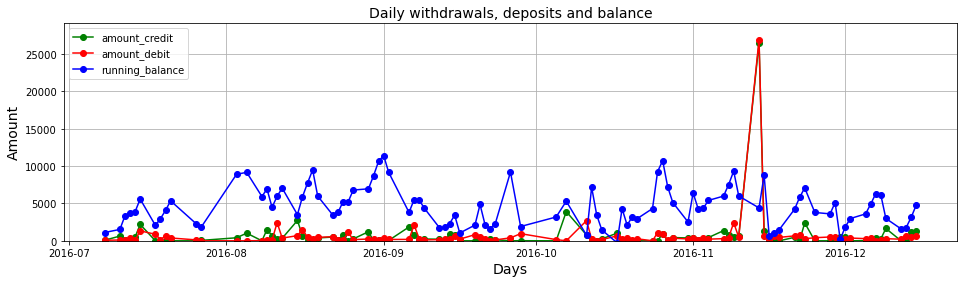

In [188]:
#the upper limit as 4100 as it makes it easier to read the graph,there is one value going out of the graph but including it makes other values incomprehensible 
graphz(df_plot_graph,29100)

The above graph compares all the three metrics but is not easy to read, so I have plotted them separately below 

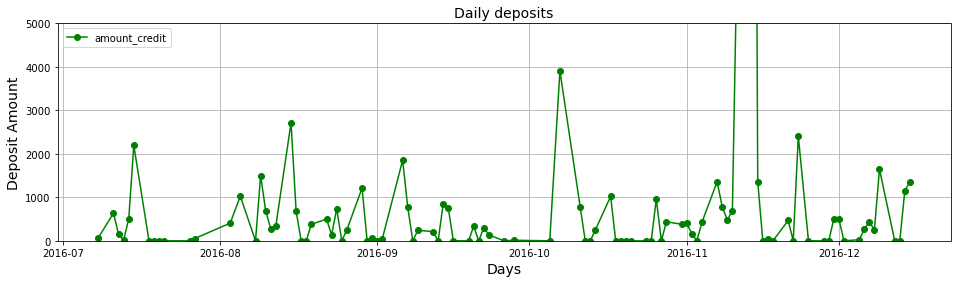

In [307]:
fig= plt.figure(figsize=(16,4))
plt.plot(df_plot_graph['post_date'], df_plot_graph['amount_credit'], color='green', marker='o', label='amount_credit')
plt.title('Daily deposits', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Deposit Amount', fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,5000))
plt.show()

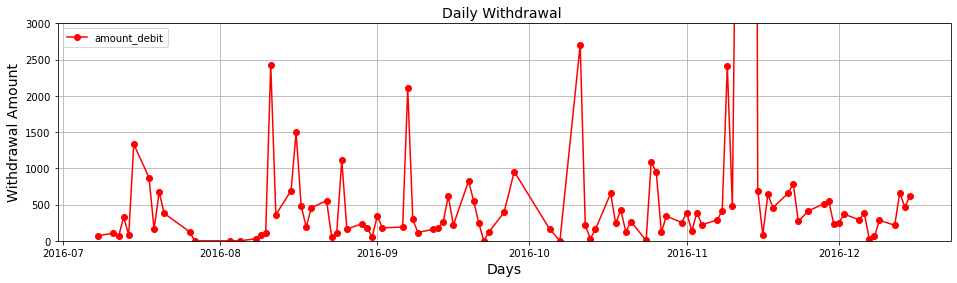

In [312]:
fig= plt.figure(figsize=(16,4))
plt.plot(df_plot_graph['post_date'], df_plot_graph['amount_debit'], color='red', marker='o', label='amount_debit')
plt.title('Daily Withdrawal ', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Withdrawal Amount', fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,3000))
plt.show()

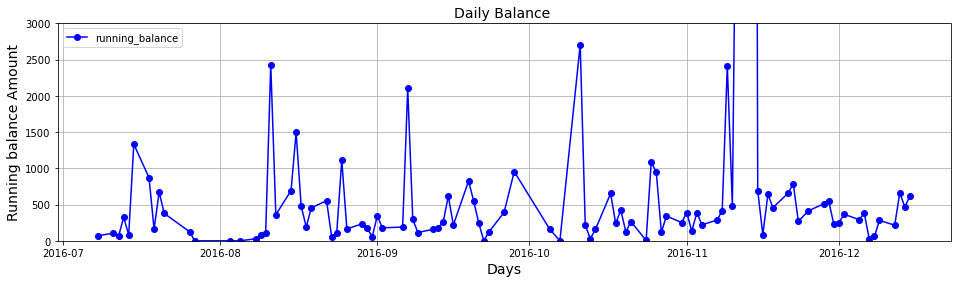

In [311]:
fig= plt.figure(figsize=(16,4))
plt.plot(df_plot_graph['post_date'], df_plot_graph['amount_debit'], color='blue', marker='o', label='running_balance')
plt.title('Daily Balance ', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Running balance Amount', fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,3000))
plt.show()

For all the three graphs, there is a massive spike in November.  I have put the upper limit for the y-axis in such a way that we can't see the outlier value because it makes it easy to compare the running balance from other post dates, which are smaller in amount. 

# 2. Consider Lead ID: 326062, bank_account_id : 14046  - plot the withdrawals, deposits and daily balance as a daily time series

In [81]:
df4=df.loc[(df['Lead ID'] ==326062) & (df['bank_account_id']==14046)]
df_plot2=df4.groupby(['post_date','transaction_type']).agg({'amount':sum})
df_plot_pivot2=pd.pivot_table(df_plot2,index=["post_date"],values=["amount"],columns=["transaction_type"]).reset_index()
df_plot_pivot2.fillna(0, inplace=True)
df_plot_pivot2.columns = df_plot_pivot2.columns.map('_'.join)
df_plot_pivot2.rename(columns={'post_date_':'post_date'}, inplace=True)
df_plot_pivot2.head()

df4.groupby(['post_date'], sort=False)['trans_order'].max()
idx = df4.groupby(['post_date'])['trans_order'].transform(max) == df4['trans_order']
df5=df4[idx]
df5 = df5[["post_date","running_balance"]]
df5.head()

df_plot_graph2=pd.merge(df_plot_pivot2,df5,on=['post_date'],how='inner')
df_plot_graph2.head()

,post_date,amount_credit,amount_debit,running_balance
0,2016-07-08,1019.38,0.00,1110.16
1,2016-07-11,2867.82,2455.36,1522.62
2,2016-07-12,6486.36,4680.34,3328.64
3,2016-07-13,2066.49,1699.56,3695.57
4,2016-07-14,1733.79,1538.99,3890.37


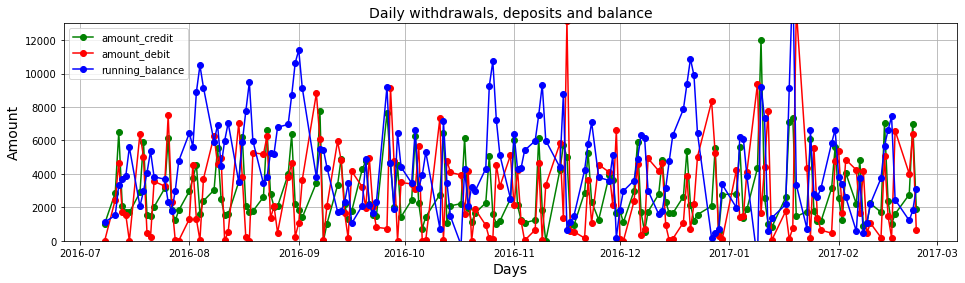

In [90]:
graphz(df_plot_graph2,13000)

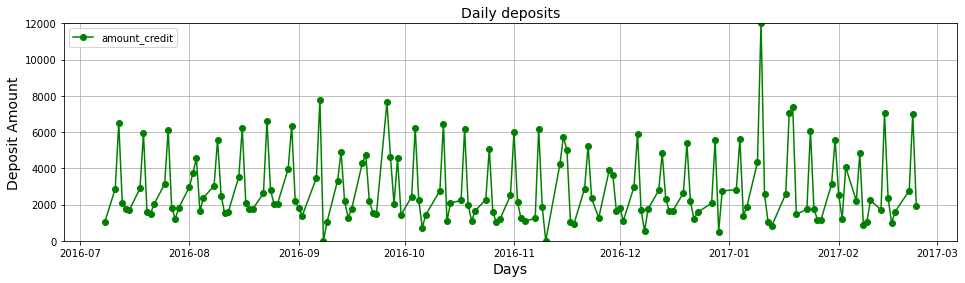

In [321]:
fig= plt.figure(figsize=(16,4))
plt.plot(df_plot_graph2['post_date'], df_plot_graph2['amount_credit'], color='green', marker='o', label='amount_credit')
plt.title('Daily deposits', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Deposit Amount', fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,12000))
plt.show()

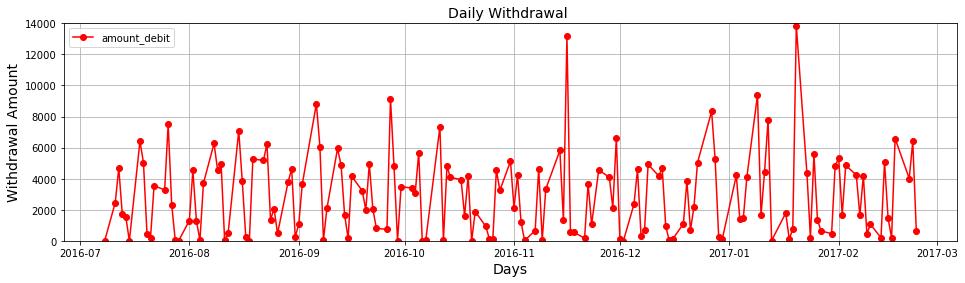

In [318]:
fig= plt.figure(figsize=(16,4))
plt.plot(df_plot_graph2['post_date'], df_plot_graph2['amount_debit'], color='red', marker='o', label='amount_debit')
plt.title('Daily Withdrawal ', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Withdrawal Amount', fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,14000))
plt.show()

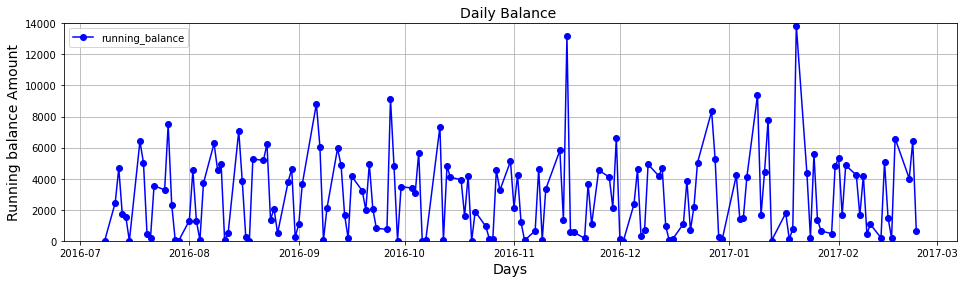

In [315]:
fig= plt.figure(figsize=(16,4))
plt.plot(df_plot_graph2['post_date'], df_plot_graph2['amount_debit'], color='blue', marker='o', label='running_balance')
plt.title('Daily Balance ', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Running balance Amount', fontsize=14)
plt.grid(True)
plt.legend(loc="upper left")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,14000))
plt.show()

## 3. For the merchants with the above Lead ID =318465, plot the withdrawals, deposits and daily balance as a daily time series (aggregate over all their bank accounts)

In [92]:
df_all=df.loc[(df['Lead ID'] ==318465)]
df_all_g=df_all.groupby(['post_date','transaction_type']).agg({'amount':sum})
df_g=pd.pivot_table(df_all_g,index=["post_date"],values=["amount"],columns=["transaction_type"]).reset_index()
df_g.fillna(0, inplace=True)
df_g.columns = df_g.columns.map('_'.join)
df_g.rename(columns={'post_date_':'post_date'}, inplace=True)

df_all.groupby(['post_date'], sort=False)['trans_order'].max()
idx = df_all.groupby(['post_date'])['trans_order'].transform(max) == df_all['trans_order']
df_bal=df_all[idx]
df_bal = df_bal[["post_date","running_balance"]]
df_total=pd.merge(df_g,df_bal,on=['post_date'],how='inner')

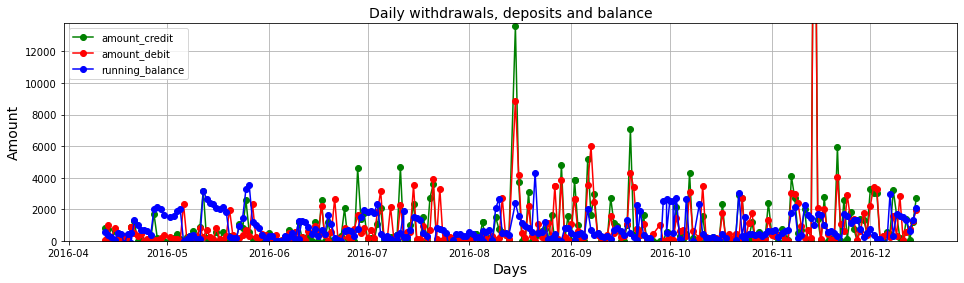

In [99]:
graphz(df_total,13780)

## 3. For the merchants with the above Lead ID =326062, plot the withdrawals, deposits and daily balance as a daily time series (aggregate over all their bank accounts)

In [101]:
df_all2=df.loc[(df['Lead ID'] ==318465)]
df_all_g2=df_all2.groupby(['post_date','transaction_type']).agg({'amount':sum})
df_g2=pd.pivot_table(df_all_g2,index=["post_date"],values=["amount"],columns=["transaction_type"]).reset_index()
df_g2.fillna(0, inplace=True)
df_g2.columns = df_g2.columns.map('_'.join)
df_g2.rename(columns={'post_date_':'post_date'}, inplace=True)

df_all2.groupby(['post_date'], sort=False)['trans_order'].max()
idx = df_all2.groupby(['post_date'])['trans_order'].transform(max) == df_all2['trans_order']
df_bal2=df_all2[idx]
df_bal2 = df_bal2[["post_date","running_balance"]]
df_total2=pd.merge(df_g2,df_bal2,on=['post_date'],how='inner')

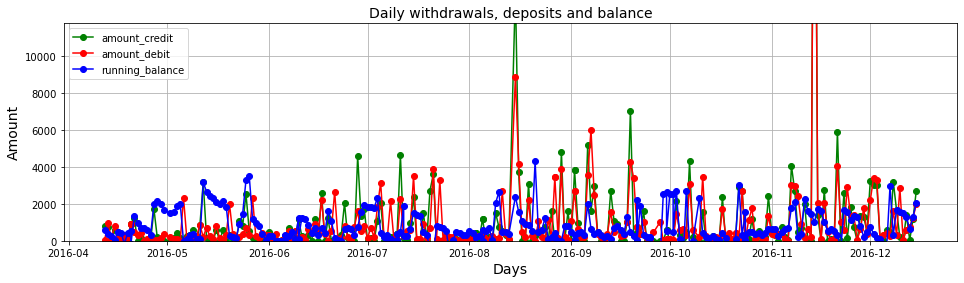

In [110]:
graphz(df_total2,11790)

## 4. The cash flow of a business has many dimensions [for example, top 5 deposits/Total deposits,  average # of days between two withdrawals, coefficient of variation of the daily balance] that are potentially relevant to a borrower’s ability to repay

In the code below, I calculated the difference (in days) between two successive withdrawals. I removed those entries where the difference was 0 days ie, multiple withdrawals on the same day. I am assuming the question does not need me to take numerous withdrawals on the same day. After calculating the difference in a day between every two withdrawals, I took an average of it for all lead id's

In [118]:
df_debit=df.loc[(df['transaction_type'] =='debit')]
df_debit["diff bw withdrawals"]=df_debit.groupby('Lead ID').post_date.diff(1)
#dfx["dA"] = dfx["post_date"].diff(1)
df_debit.dropna(subset = ["diff bw withdrawals"], inplace=True)
df_debit['diff bw withdrawals'] = df_debit['diff bw withdrawals'].astype(str)
df_debit[['diff bw withdrawal','Last']] = df_debit['diff bw withdrawals'].str.split("d",expand=True)
df_debit['avg days b/w withdrawals'] = df_debit['diff bw withdrawal'].astype(int)
grouped_df_debit=df_debit.groupby('Lead ID').agg({'avg days b/w withdrawals':'mean'}).round(2)
grouped_df_debit.head(10)

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,avg days b/w withdrawals
Lead ID,
308148,0.80
310443,0.68
312745,0.49
313082,0.26
314036,0.16
314559,0.67
316728,0.03
318465,0.15
321146,0.49


Here, I calculated the total depoist, mean despoist and same for credits along with the standard deviation for the running balance

In [182]:
df_credit=df.loc[(df['transaction_type'] =='credit')]
df_debit=df.loc[(df['transaction_type'] =='debit')]

top_credit=df_credit.groupby('Lead ID').amount.nlargest(5).reset_index().astype(int)
top_credit= top_credit.drop('level_1', 1)
top_credit.rename(columns={'amount':'Top 5 Deposits'}, inplace=True)

top_debit=df_debit.groupby('Lead ID').amount.nlargest(5).reset_index().astype(int)
top_debit= top_debit.drop('level_1', 1)
top_debit.rename(columns={'amount':'Top 5 withdrawals'}, inplace=True)

debit=df_debit.groupby('Lead ID').agg({"amount": [("Mean_Debit",'mean'), ("Total_Debit","sum")]}).round(2)
credit=df_credit.groupby('Lead ID').agg({"amount": [("Mean_Credit",'mean'), ("Total_credit","sum")]}).round(2)

df.groupby(['Lead ID','post_date'], sort=False)['trans_order'].max()
idx = df.groupby(['Lead ID','post_date'])['trans_order'].transform(max) == df['trans_order']
df8=df[idx]
df8 = df8[["Lead ID","post_date","running_balance"]]
df8=df8.groupby('Lead ID').agg({"running_balance": "std"}).round(2)
df8.rename(columns={'running_balance':'Coeff_of Var for Running Bal'}, inplace=True)

In [172]:
cash_flow=debit.merge(credit,on='Lead ID').merge(df8, on='Lead ID')

C:\Users\imsid\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [175]:
print(" The many dimensions of cash flow for each merchant's business are :") 
cash_flow.head(10)

 The many dimensions of cash flow for each merchant's business are :


,"(amount, Mean_Debit)","(amount, Total_Debit)","(amount, Mean_Credit)","(amount, Total_credit)",Coeff_of Var for Running Bal
Lead ID,,,,,
308148,193.12,61799.63,387.27,66611.03,1881.63
310443,1409.20,346662.04,9289.52,325133.22,27037.79
312745,1188.75,713250.53,4496.49,719437.89,10221.26
313082,544.71,558877.28,4884.15,547025.33,6294.73
314036,218.12,432974.81,1615.65,445920.11,3846.63
314559,1830.33,519814.25,3689.64,527617.92,8350.90
316728,1044.01,2415843.54,8265.17,2463019.63,25416.69
318465,135.51,229560.94,628.32,231848.55,862.38
321146,221.57,100592.42,875.47,105932.46,950.28


In [184]:
print("The Top 5 deposits for each merchant's business are :") 
top_credit.head(11)

The Top 5 deposits for each merchant's business are :


,Lead ID,Top 5 Deposits
0,308148,11511
1,308148,5000
2,308148,4900
3,308148,2600
4,308148,1500
5,310443,79181
6,310443,38708
7,310443,31336
8,310443,25022
9,310443,23000


In [183]:
print("The Top 5 withdrawals for each merchant's business are :") 
top_debit.head(11)

The Top 5 withdrawals for each merchant's business are :


,Lead ID,Top 5 withdrawals
0,308148,3656
1,308148,3656
2,308148,3656
3,308148,1450
4,308148,1450
5,310443,25000
6,310443,23443
7,310443,23000
8,310443,18450
9,310443,16650


## 5. Develop a program by which clusters of similar transactions for a merchant can be identified from transaction descriptions and other information

Let us consider one merchant at a time; I have taken the merchant with lead id= 308148. Based on the information, I will group similar transactions for this merchant in one cluster. I will use the type of transaction, running balance, etc., to drive this information. Since some of the columns are categorical in nature, I will encode them into numeric values as that will make it suitable for k-means clustering

In [300]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df_clust=df.loc[(df['Lead ID'] ==308148)]
c=df_clust.iloc[:, [1,2,4,7,8]]
labelencoder = LabelEncoder()
c['transaction_type'] = labelencoder.fit_transform(c['transaction_type'])
c['Industry'] = labelencoder.fit_transform(c['Industry'])

In [298]:
kmeans5 = KMeans(n_clusters=5)
c["Clusters"] = kmeans5.fit_predict(c)
c.head(10)

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bankid,bank_account_id,Industry,transaction_type,amount,Clusters
0,8535,12460,0,0,5000.00,1
1,8535,12460,0,0,16.00,0
2,8535,12460,0,0,1000.00,3
3,8535,12460,0,1,1015.50,3
4,8535,12460,0,1,27.62,0
5,8535,12460,0,1,3.24,0
6,8535,12460,0,1,6.48,0
7,8535,12460,0,1,1200.00,3
8,8535,12460,0,1,255.88,4
9,8535,12460,0,1,21.90,0


As we can see, thw cluster column tells us which transactions are similar for the Merchant with lead id  =308148. I have excluded transaction description right now as K means is unable to handle text information.

For other merchants, a similar approach will be used.